In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import os

pd.set_option("display.max_columns", None)

In [2]:
housing = pd.read_csv("train.csv")

In [3]:
housing.shape

(1460, 81)

In [4]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Keeping rows having atleast 85% of non-NA values

In [6]:
housing.dropna(axis="index", thresh=(housing.shape[1] * 0.85), inplace=True)

##### Keeping columns having atleast 80% of non-NA values

In [7]:
housing.dropna(axis="columns", thresh=(housing.shape[0] * 0.8), inplace=True)

In [8]:
housing.shape

(1453, 75)

##### Value Counts for every feature

In [9]:
for each_series in housing:
    print(housing[each_series].value_counts(dropna=False), "\n")

Id
1       1
981     1
979     1
978     1
977     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1453, dtype: int64 

MSSubClass
20     534
60     299
50     143
120     87
30      69
160     63
70      60
80      58
90      50
190     28
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64 

MSZoning
RL         1146
RM          216
FV           65
RH           16
C (all)      10
Name: count, dtype: int64 

LotFrontage
NaN      259
60.0     142
70.0      69
80.0      69
50.0      56
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: count, Length: 111, dtype: int64 

LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
12243     1
1526      1
9490      1
15578     1
9717      1
Name: count, Length: 1069, dtype: int64 

Street
Pave    1447
Grvl       6
Name: count, dtype: int64 

LotShape
Reg    918
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64 

Land

##### Type Conversion of Columns

In [10]:
housing["GarageYrBlt"] = housing["GarageYrBlt"].astype("Int64")

columns_to_convert_in_categorical = [
    "MSSubClass",
    "OverallQual",
    "OverallCond",
    "LowQualFinSF",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageCars",
    "3SsnPorch",
    "PoolArea",
    "MiscVal",
    "MoSold",
    "YrSold",
]
for column in columns_to_convert_in_categorical:
    housing[column] = housing[column].astype("object")

In [11]:
housing_categorical = housing.select_dtypes(include=object)
housing_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,TA,TA,Y,0,0,0,2,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,TA,TA,Y,0,0,0,5,2007,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,TA,TA,Y,0,0,0,9,2008,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,0,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,TA,TA,Y,0,0,0,2,2006,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,TA,TA,Y,0,0,0,12,2008,WD,Normal


In [12]:
housing_numerical = housing.select_dtypes(include=["Int64", "float64", "int64"])
housing_numerical.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,2003,548,0,61,0,0,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,1976,460,298,0,0,0,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,2001,608,0,42,0,0,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1998,642,0,35,272,0,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,2000,836,192,84,0,0,250000


##### Data Visualisation

<Axes: >

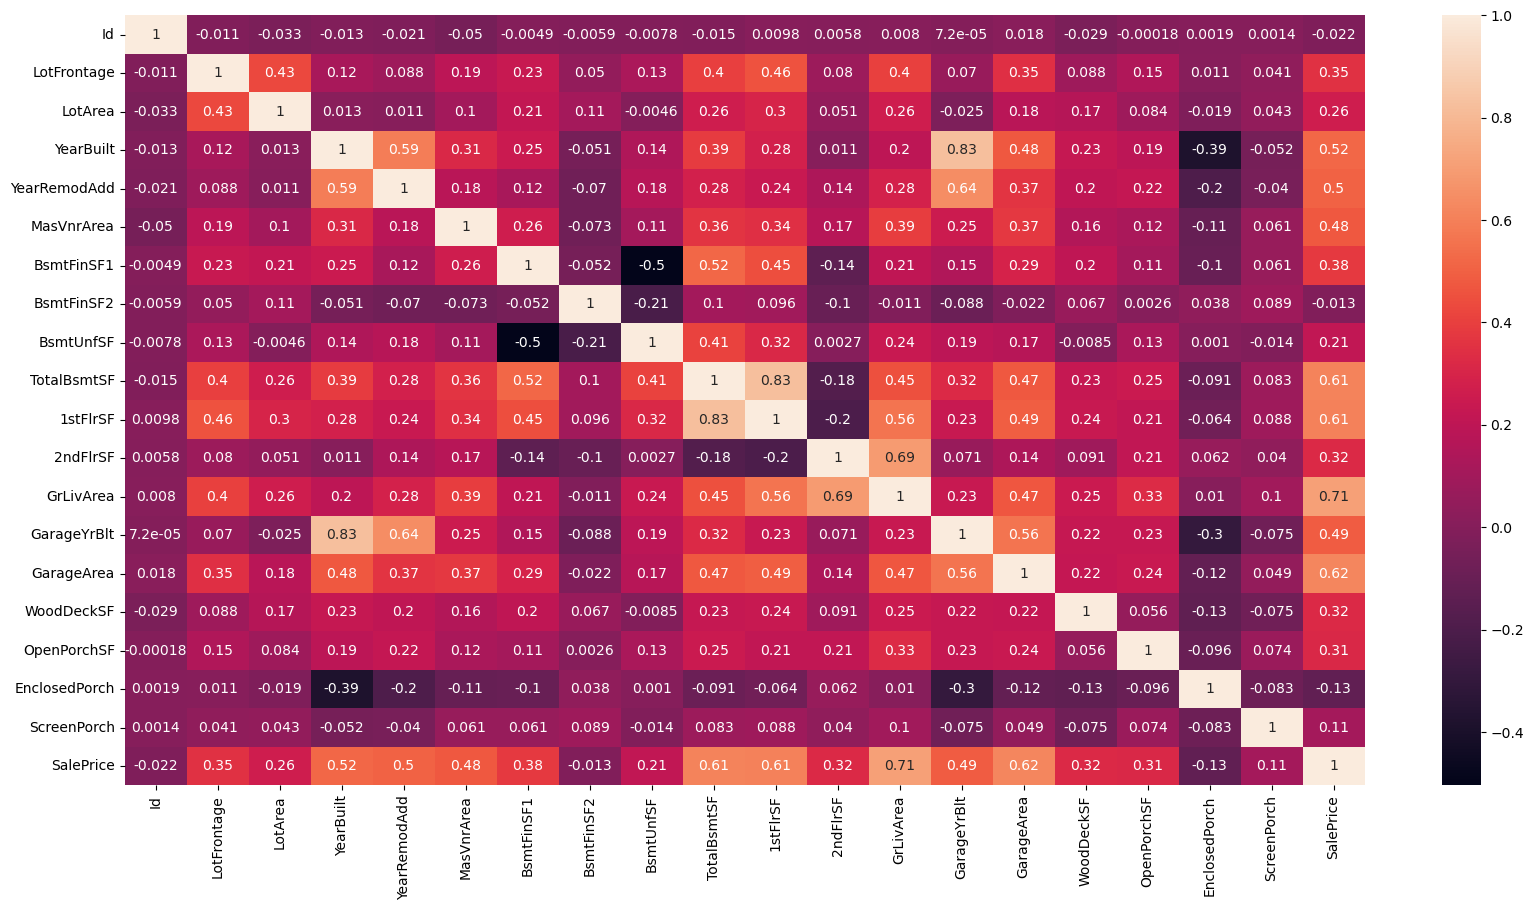

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=housing_numerical.corr(), annot=True)

1. Most of the independent variables are weakly correlated with each other.
2. Some of the independent variables are correlated with the dependent variable.

##### Dummy Variables for Categorical Variables

In [14]:
housing_categorical = pd.get_dummies(housing_categorical, drop_first=True, dtype=int)
housing_categorical.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,LowQualFinSF_53,LowQualFinSF_80,LowQualFinSF_120,LowQualFinSF_144,LowQualFinSF_156,LowQualFinSF_205,LowQualFinSF_232,LowQualFinSF_234,LowQualFinSF_360,LowQualFinSF_371,LowQualFinSF_384,LowQualFinSF_390,LowQualFinSF_392,LowQualFinSF_397,LowQualFinSF_420,LowQualFinSF_473,LowQualFinSF_479,LowQualFinSF_481,LowQualFinSF_513,LowQualFinSF_514,LowQualFinSF_515,LowQualFinSF_528,LowQualFinSF_572,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,F

In [15]:
housing = pd.concat(objs=[housing_numerical, housing_categorical], axis=1)
housing.shape

(1453, 363)

In [16]:
housing.drop(
    columns=[
        "GrLivArea",
        "OverallQual_10",
        "OverallQual_9",
        "TotalBsmtSF",
        "Neighborhood_StoneBr",
    ],
    inplace=True,
)

##### Filling remaining NA values

In [17]:
housing["LotFrontage"] = housing["LotFrontage"].fillna(0)
housing["MasVnrArea"] = housing["MasVnrArea"].fillna(0)
housing["GarageYrBlt"] = housing["GarageYrBlt"].fillna(
    housing["GarageYrBlt"].value_counts().index[0]
)

##### Splitting Data into Train and Test Sets

In [18]:
housing_train, housing_test = train_test_split(housing, test_size=0.25, random_state=26)

##### Rescaling of Features

In [19]:
scaler = MinMaxScaler()

housing_train = pd.DataFrame(
    scaler.fit_transform(housing_train),
    columns=housing_train.columns,
    index=housing_train.index,
)

In [20]:
housing_train.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,LowQualFinSF_53,LowQualFinSF_80,LowQualFinSF_120,LowQualFinSF_144,LowQualFinSF_156,LowQualFinSF_205,LowQualFinSF_232,LowQualFinSF_234,LowQualFinSF_360,LowQualFinSF_371,LowQualFinSF_384,LowQualFinSF_390,LowQualFinSF_392,LowQualFinSF_397,LowQualFinSF_420,LowQualFinSF_473,LowQualFinSF_479,LowQualFinSF_481,LowQualFinSF_513,LowQualFinSF_514,LowQualFinSF_515,LowQualFinSF_528,LowQualFinSF_572,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,

##### Splitting Train Set into X and y

In [21]:
housing_y_train = housing_train.pop(item="SalePrice")
housing_X_train = housing_train

##### Applying Scaling on Test Set

In [22]:
housing_test = pd.DataFrame(
    scaler.transform(housing_test),
    columns=housing_test.columns,
    index=housing_test.index,
)

In [23]:
housing_test.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,LowQualFinSF_53,LowQualFinSF_80,LowQualFinSF_120,LowQualFinSF_144,LowQualFinSF_156,LowQualFinSF_205,LowQualFinSF_232,LowQualFinSF_234,LowQualFinSF_360,LowQualFinSF_371,LowQualFinSF_384,LowQualFinSF_390,LowQualFinSF_392,LowQualFinSF_397,LowQualFinSF_420,LowQualFinSF_473,LowQualFinSF_479,LowQualFinSF_481,LowQualFinSF_513,LowQualFinSF_514,LowQualFinSF_515,LowQualFinSF_528,LowQualFinSF_572,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,

##### Splitting Test Set into X and y

In [24]:
housing_y_test = housing_test.pop(item="SalePrice")
housing_X_test = housing_test

##### Fitting Linear Regression model on Train Set

In [21]:
lin_reg = LinearRegression()

In [22]:
lin_reg.fit(housing_X_train, housing_y_train)

LinearRegression()

In [23]:
lin_reg.intercept_

33247688567.18443

In [24]:
lin_reg.coef_

array([ 2.38113982e-03,  7.48932211e-03,  1.71099218e-01,  6.46676888e-02,
        8.26473902e-03,  5.76455327e-02, -1.06369831e+11, -2.04484881e+10,
       -4.40255007e+10,  1.15152316e+11, -1.09003245e+11, -4.65838975e+10,
        1.33345766e+11, -5.55276871e-04,  5.75361252e-02,  1.97677612e-02,
       -7.53951073e-03,  1.78403854e-02,  3.59848142e-02,  3.71360779e-03,
        2.69723126e+09,  9.35134888e-02, -1.89332962e-02,  7.03430176e-03,
        1.28411055e-02, -3.94945145e-02, -4.47273254e-02, -3.39722633e-02,
        1.45141468e+10, -6.39305115e-02, -5.57808876e-02, -8.79549980e-02,
       -5.49051762e-02,  9.94367599e-02,  6.84204102e-02,  7.48062134e-02,
        6.95190430e-02, -8.60548019e-03,  1.05762482e-02,  8.61883163e-03,
        3.31878662e-03,  2.13837624e-02,  1.68623924e-02,  1.29375458e-02,
       -8.89395475e-02,  1.37882233e-02, -2.05655098e-02, -3.29868793e-02,
       -4.35638428e-03, -5.66625595e-03, -3.09448242e-02, -2.35159993e-02,
       -1.73029900e-02, -

In [28]:
housing_y_train_pred = lin_reg.predict(X=housing_X_train)
housing_y_test_pred = lin_reg.predict(X=housing_X_test)

##### R-Squared Score for Train Set

In [29]:
r2_score(y_true=housing_y_train, y_pred=housing_y_train_pred)

0.946500982218142

##### Residual Sum of Squares for Train Set

In [30]:
np.sum(np.square(housing_y_train - housing_y_train_pred))

1.0619725821514725

##### Root Mean Squared Error for Train Set

In [31]:
(mean_squared_error(housing_y_train, housing_y_train_pred)) ** 0.5

0.03122789513371863

##### R-Squared Score for Test Set

In [32]:
r2_score(y_true=housing_y_test, y_pred=housing_y_test_pred)

-3.47008597748918e+20

##### Residual Sum of Squares for Test Set

In [33]:
np.sum(np.square(housing_y_test - housing_y_test_pred))

2.2114216563608665e+21

##### Root Mean Squared Error for Test Set

In [34]:
(mean_squared_error(housing_y_test, housing_y_test_pred)) ** 0.5

2464819307.935495

##### The values of r2_score, rss and rmse shows that the above linear regression model is performing worse than the mean model. The reason for this performance is the overfitting of model. Let's train a ridge regression and a lasso regression model further.

In [25]:
# variable initialization for Grid Search Cross Validation
params = {
    "alpha": [
        0.0001,
        0.001,
        0.01,
        0.05,
        0.1,
        0.2,
        0.3,
        0.4,
        0.5,
        0.6,
        0.7,
        0.8,
        0.9,
        1.0,
        2.0,
        3.0,
        4.0,
        5.0,
        6.0,
        7.0,
        8.0,
        9.0,
        10.0,
        20,
        50,
        100,
        500,
        1000,
    ]
}

folds = 5

##### Grid Search Cross Validation for Ridge Regression

In [36]:
ridge = Ridge()

model_cv = GridSearchCV(
    estimator=ridge,
    param_grid=params,
    scoring="neg_mean_absolute_error",
    cv=folds,
    return_train_score=True,
    verbose=1,
)

In [37]:
model_cv.fit(X=housing_X_train, y=housing_y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [38]:
ridge = Ridge(alpha=model_cv.best_params_["alpha"])
ridge.fit(X=housing_X_train, y=housing_y_train)

Ridge(alpha=7.0)

In [39]:
ridge.intercept_

0.12006141823533487

In [40]:
ridge.coef_

array([-3.07227750e-03, -3.61910563e-03,  2.47620990e-02,  1.45547924e-02,
        1.88128247e-02,  3.40953962e-02,  2.29528048e-02,  1.64022176e-02,
        1.99322756e-02,  3.17354881e-02,  4.77109802e-02,  3.48361390e-02,
        5.38297984e-02, -3.62640799e-03,  2.38240877e-02,  2.70253299e-02,
        5.22895029e-03,  3.75884382e-03,  3.37229256e-02, -1.50155081e-02,
       -5.43328450e-04,  4.20153227e-03,  3.58158062e-03, -4.17473910e-03,
        4.78710857e-03,  1.12439450e-02, -5.06438972e-03, -5.08176051e-03,
       -7.60806763e-03, -1.73760200e-02, -1.47640885e-02, -1.35076982e-02,
       -3.73748855e-03,  1.87106953e-02,  5.01225330e-03,  1.25553208e-02,
       -1.00527640e-03,  1.19262950e-02,  1.48901868e-02, -5.62454596e-03,
        1.56701142e-04,  1.81264995e-02,  1.33592371e-02,  1.37651843e-02,
       -6.91685629e-03,  1.96751002e-02, -1.22292177e-02, -7.40533114e-03,
       -1.85097072e-03,  2.93982288e-03,  1.69926853e-02, -1.34628782e-03,
        5.70181071e-03,  

In [41]:
housing_y_train_pred = ridge.predict(X=housing_X_train)
housing_y_test_pred = ridge.predict(X=housing_X_test)

##### R-Squared Score for Train Set

In [42]:
r2_score(housing_y_train, housing_y_train_pred)

0.908677026733532

##### Residual Sum of Squares for Train Set

In [43]:
np.sum(np.square(housing_y_train - housing_y_train_pred))

1.8127901735502252

##### Root Mean Squared Error for Train Set

In [44]:
(mean_squared_error(housing_y_train, housing_y_train_pred)) ** 0.5

0.04079996864308363

##### R-Squared Score for Test Set

In [45]:
r2_score(housing_y_test, housing_y_test_pred)

0.8381561281625962

##### Residual Sum of Squares for Test Set

In [46]:
np.sum(np.square(housing_y_test - housing_y_test_pred))

1.0314010818530024

##### Root Mean Square Error for Test Set

In [47]:
(mean_squared_error(housing_y_test, housing_y_test_pred)) ** 0.5

0.05323081302817116

In [48]:
ridge = Ridge(alpha=model_cv.best_params_["alpha"] * 2)
ridge.fit(X=housing_X_train, y=housing_y_train)

Ridge(alpha=14.0)

In [49]:
ridge_coefficient = pd.DataFrame(
    data={"features": ridge.feature_names_in_, "coefficient": ridge.coef_}
)

In [50]:
ridge_coefficient.sort_values("coefficient", ascending=False)

,features,coefficient
108,OverallQual_9,0.054403
72,Neighborhood_StoneBr,0.043039
12,GrLivArea,0.041434
233,FullBath_3,0.037811
176,BsmtExposure_Gd,0.037256
...,...,...
102,OverallQual_3,-0.025539
231,FullBath_1,-0.025764
247,KitchenQual_Gd,-0.026840
57,Neighborhood_Edwards,-0.028566


##### Grid Search Cross Validation for Lasso Regression

In [26]:
lasso = Lasso()

model_cv = GridSearchCV(
    estimator=lasso,
    param_grid=params,
    scoring="neg_mean_absolute_error",
    cv=folds,
    return_train_score=True,
    verbose=1,
)

In [27]:
model_cv.fit(housing_X_train, housing_y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [28]:
housing_X_train.shape

(1089, 357)

In [29]:
lasso = Lasso(alpha=model_cv.best_params_["alpha"])
lasso.fit(housing_X_train, housing_y_train)

Lasso(alpha=0.0001)

In [30]:
lasso.intercept_

0.11554865509015277

In [31]:
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  9.31163714e-02,  4.46578825e-02,
        1.32875618e-02,  4.21311859e-02,  1.58935665e-01,  2.48406492e-02,
        3.03665606e-02,  3.29709917e-01,  1.10517241e-01,  0.00000000e+00,
        2.22788095e-02,  2.35489671e-02,  0.00000000e+00,  0.00000000e+00,
        3.23017346e-02, -1.05636018e-02,  0.00000000e+00,  0.00000000e+00,
        1.83596510e-04,  0.00000000e+00,  0.00000000e+00,  5.20837677e-03,
       -0.00000000e+00, -0.00000000e+00, -1.01119564e-02, -0.00000000e+00,
       -1.78658514e-03, -0.00000000e+00, -0.00000000e+00,  2.38462201e-02,
        1.41443734e-04,  1.27172693e-02, -0.00000000e+00,  2.62515175e-03,
        6.46641959e-03,  0.00000000e+00, -0.00000000e+00,  1.92460392e-02,
        3.01303125e-03,  8.19916147e-03, -0.00000000e+00,  1.93537210e-02,
       -4.94304702e-03, -0.00000000e+00, -9.21090791e-04, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [32]:
housing_y_train_pred = lasso.predict(X=housing_X_train)
housing_y_test_pred = lasso.predict(X=housing_X_test)

##### R-Squared Score for Train Set

In [33]:
r2_score(y_true=housing_y_train, y_pred=housing_y_train_pred)

0.9253670137360994

##### Residual Sum of Squares for Train Set

In [34]:
np.sum(np.square(housing_y_train - housing_y_train_pred))

1.4814886033894068

##### Root Mean Squared Error for Train Set

In [35]:
(mean_squared_error(housing_y_train, housing_y_train_pred)) ** 0.5

0.036883762561183954

##### R-Squared Score for Test Set

In [36]:
r2_score(y_true=housing_y_test, y_pred=housing_y_test_pred)

0.8773971603470563

##### Residual Sum of Squares for Test Set

In [37]:
np.sum(np.square(housing_y_test - housing_y_test_pred))

0.7813252366041813

##### Root Mean Squared Error for Test Set

In [38]:
(mean_squared_error(housing_y_test, housing_y_test_pred)) ** 0.5

0.04633031300087168

In [63]:
lasso = Lasso(alpha=model_cv.best_params_["alpha"] * 2)
lasso.fit(housing_X_train, housing_y_train)

Lasso(alpha=0.0002)

In [39]:
lasso_coefficient = pd.DataFrame(
    data={"features": lasso.feature_names_in_, "coefficient": lasso.coef_}
)

In [40]:
lasso_coefficient.sort_values("coefficient", ascending=False)

,features,coefficient
9,1stFlrSF,0.329710
6,BsmtFinSF1,0.158936
10,2ndFlrSF,0.110517
2,LotArea,0.093116
252,TotRmsAbvGrd_12,0.079158
...,...,...
101,OverallQual_5,-0.078831
100,OverallQual_4,-0.080175
99,OverallQual_3,-0.087822
83,Condition2_PosN,-0.253517
